# DLNLP Project Group - 4

Anuksha Jain - 015002 |
Ayushi Gupta - 015005 |
Aniket Nandy - 015015 |
Biswadip Das - 015025 |
Siddharth Gupta - 015045 

Dataset link : https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

# Importing Libraries

In [1]:
pip install opencv-python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Creating Colour Palatte 


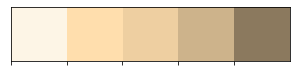

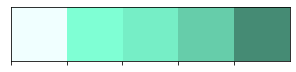

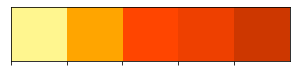

In [4]:
lightpalatte = ["#FDF5E6", "#FFDEAD", '#EECFA1', '#CDB38B', '#8B795E']
Aquapalatte = ["#F0FFFF", "#7FFFD4", '#76EEC6', '#66CDAA', '#458B74']
redpalatte = ['#FFF68F','#FFA500','#FF4500','#EE4000','#CD3700']

sns.palplot(lightpalatte)
sns.palplot(Aquapalatte)
sns.palplot(redpalatte)


# Data Preperation

In [5]:
Labels = ['meningioma_tumor','glioma_tumor','pituitary_tumor','no_tumor']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X_train = []
y_train = []
Imagesize = 150

In [8]:
for k in Labels:
    folderPath = os.path.join('/content/drive/MyDrive/DLNLP_Mid_Term/','Training',k)
    for l in tqdm(os.listdir(folderPath)):
        Img = cv2.imread(os.path.join(folderPath,l))
        Img = cv2.resize(Img,(Imagesize, Imagesize))
        X_train.append(Img)
        y_train.append(k)
        
for k in Labels:
    folderPath = os.path.join('/content/drive/MyDrive/DLNLP_Mid_Term/','Testing',k)
    for l in tqdm(os.listdir(folderPath)):
        Img = cv2.imread(os.path.join(folderPath,l))
        Img = cv2.resize(Img,(Imagesize,Imagesize))
        X_train.append(Img)
        y_train.append(k)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 105/105 [00:50<00:00,  2.07it/s]


In [9]:
X_train.shape

(3264, 150, 150, 3)

Our train data has 3264 images of size 150*150 and 3 channels i.e RGB (Red, Green, Blue)

In [10]:
y_train.shape

(3264,)

In [11]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [3, 3, 3],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [4, 4, 4],
        [2, 2, 2]],

       ...,

       [[0, 0, 0],
        [1, 1, 1],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

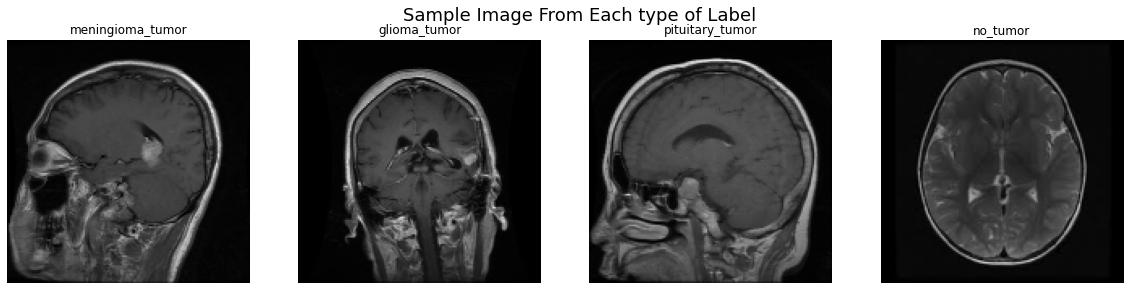

In [12]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each type of Label',size=18,
             y=0.6,x=0.4)
for i in Labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [13]:
X_train, y_train = shuffle(X_train,y_train, random_state=42)

In [14]:
X_train.shape

(3264, 150, 150, 3)

Dividing the dataset into **Training** and **Testing** sets.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.3,random_state=42)

Performing **One Hot Encoding** on the labels after converting it into numerical values:

In [16]:
y_train_new = []
for i in y_train:
    y_train_new.append(Labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(Labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# Transfer Learning

In [17]:
effinet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(Imagesize,Imagesize,3))

16719872/16705208 [==============================] - 0s 0us/step


In [18]:
model1 = effinet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(64,activation='softmax')(model1)
model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=effinet.input, outputs = model1)

In [19]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 150, 150, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 150, 150, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [20]:
model1.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [21]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

# Training The Model

In [22]:
history  = model1.fit(X_train,y_train,validation_split=0.3, epochs =25, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/25
50/50 [==============================] - 212s 4s/step - loss: 1.2059 - accuracy: 0.7753 - val_loss: 1.1671 - val_accuracy: 0.7434

Epoch 00001: val_accuracy improved from -inf to 0.74344, saving model to effnet.h5
Epoch 2/25
50/50 [==============================] - 197s 4s/step - loss: 1.0976 - accuracy: 0.8561 - val_loss: 1.2230 - val_accuracy: 0.5671

Epoch 00002: val_accuracy did not improve from 0.74344
Epoch 3/25
50/50 [==============================] - 196s 4s/step - loss: 1.0478 - accuracy: 0.8655 - val_loss: 1.0594 - val_accuracy: 0.7974

Epoch 00003: val_accuracy improved from 0.74344 to 0.79738, saving model to effnet.h5
Epoch 4/25
50/50 [==============================] - 196s 4s/step - loss: 0.9868 - accuracy: 0.8780 - val_loss: 1.0858 - val_accuracy: 0.7026

Epoch 00004: val_accuracy did not improve from 0.79738
Epoch 5/25
50/50 [==============================] - 191s 4s/step - loss: 0.9672 - accuracy: 0.8454 - val_loss: 1.2766 - val_accuracy: 0.3761

Epoch 00005

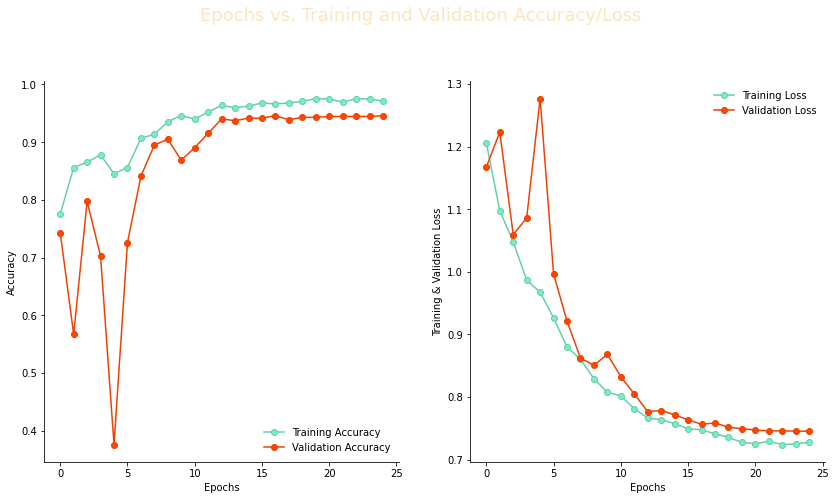

In [24]:
filterwarnings('ignore')

epochs = [i for i in range(25)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,
             color=lightpalatte[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=Aquapalatte[2],color=Aquapalatte[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=redpalatte[2],color=redpalatte[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=Aquapalatte[2],color=Aquapalatte[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=redpalatte[2],color=redpalatte[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

# Prediction

In [25]:
pred = model1.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

# Evaluation

Dictionary: <br>
0 - Glioma Tumor<br>
1 - No Tumor<br>
2 - Meningioma Tumor<br>
3 - Pituitary Tumor<br>

In [26]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       300
           1       0.94      0.92      0.93       275
           2       0.95      0.99      0.97       265
           3       0.94      0.99      0.96       140

    accuracy                           0.94       980
   macro avg       0.94      0.95      0.94       980
weighted avg       0.94      0.94      0.94       980



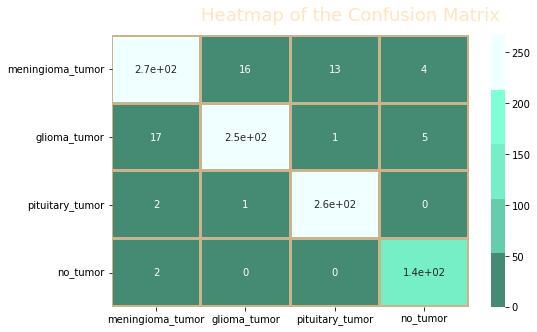

In [27]:
fig,ax=plt.subplots(1,1,figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=Labels,yticklabels=Labels,annot=True,
           cmap=Aquapalatte[::-1],linewidths=2,linecolor=lightpalatte[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,
             color=lightpalatte[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

Image Classification with the help of CNN using Transfer Learning gave us an accuracy of around 94%.<br>

---